In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [49]:
data = pd.read_csv('car_price_prediction.csv')

## 1- Explore Data

In [50]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [51]:
data.shape

(19237, 18)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [53]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,19237.0,4.557654e+07,936591.422799,20746880.0,45698374.0,45772308.0,45802036.0,45816654.0
Price,19237.0,1.855593e+04,190581.269684,1.0,5331.0,13172.0,22075.0,26307500.0
Prod. year,19237.0,2.010913e+03,5.668673,1939.0,2009.0,2012.0,2015.0,2020.0
Cylinders,19237.0,4.582991e+00,1.199933,1.0,4.0,4.0,4.0,16.0
Airbags,19237.0,6.582627e+00,4.320168,0.0,4.0,6.0,12.0,16.0


In [54]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [55]:
duplicates = data[data.duplicated()]
duplicates.head(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12


In [56]:
data.drop_duplicates(inplace=True)
data.shape

(18924, 18)

## 2- Analysis

In [57]:
data['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [58]:
list=[]
for col in data.columns:
    print(col, ':', data[col].nunique())


ID : 18924
Price : 2315
Levy : 559
Manufacturer : 65
Model : 1590
Prod. year : 54
Category : 11
Leather interior : 2
Fuel type : 7
Engine volume : 107
Mileage : 7687
Cylinders : 13
Gear box type : 4
Drive wheels : 3
Doors : 3
Wheel : 2
Color : 16
Airbags : 17


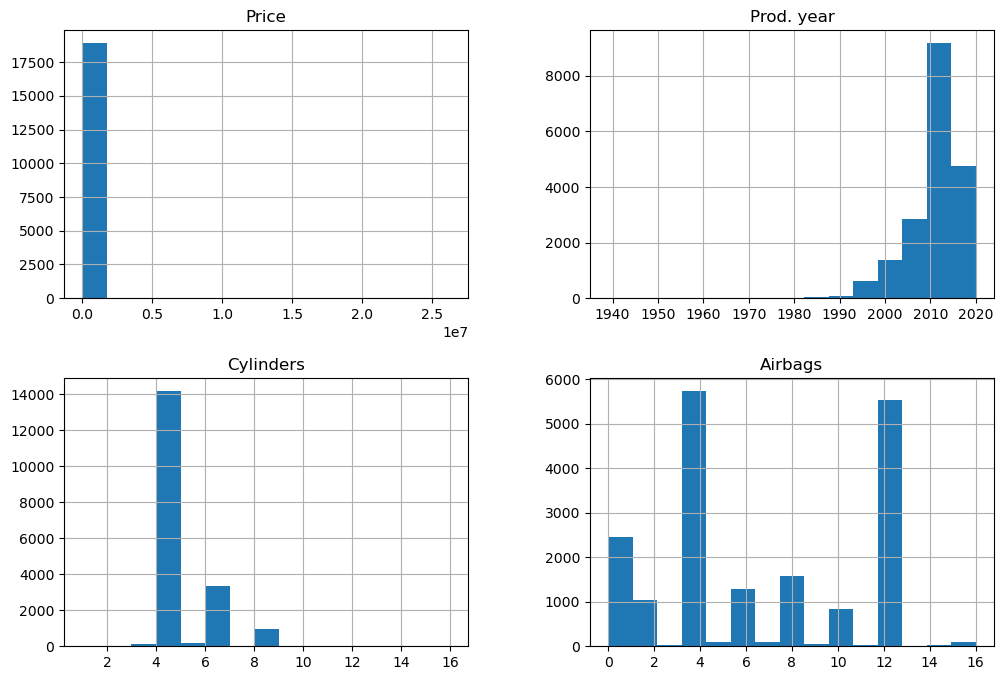

In [59]:
data.drop('ID',axis=1).hist(bins=15, figsize=(12,8))
plt.show()

In [60]:
top10cars = data['Manufacturer'].value_counts().sort_values(ascending=False)[:10]
top10cars

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

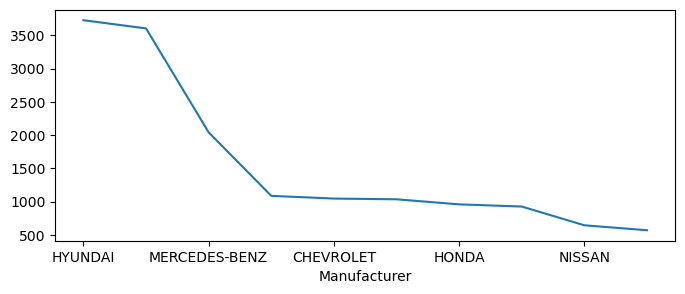

In [61]:
top10cars.plot(figsize=(8,3))
plt.show()

In [62]:
top10carsPrices = [data[data['Manufacturer']== i]['Price'].mean() for i in top10cars.index ]

In [63]:
top10carsPrices

[22306.00080450523,
 14302.447864669994,
 18590.331375428294,
 15411.85018382353,
 14894.873925501433,
 20609.468146718147,
 14162.073958333332,
 20052.594390507013,
 9835.84031007752,
 11471.77408056042]

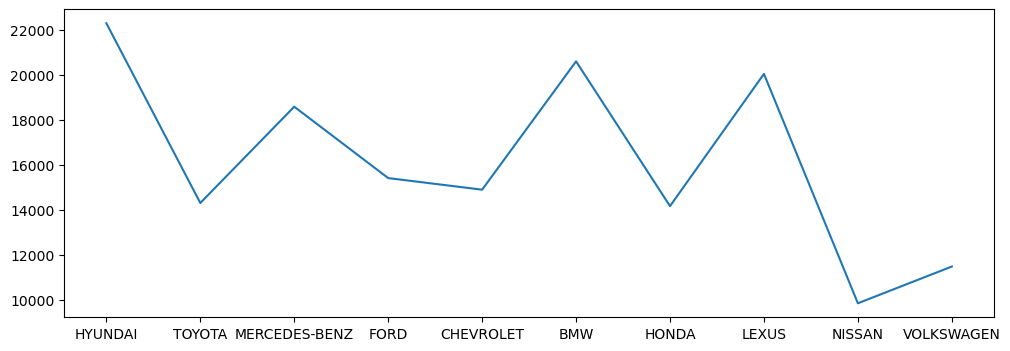

In [64]:
plt.figure(figsize=(12,4))
plt.plot(top10cars.index, top10carsPrices)
plt.show()

In [65]:
data.select_dtypes('number').corr()

,ID,Price,Prod. year,Cylinders,Airbags
ID,1.000000,-0.000797,0.072030,-0.040617,-0.022070
Price,-0.000797,1.000000,0.012689,0.007435,-0.012709
Prod. year,0.072030,0.012689,1.000000,-0.099443,0.235160
Cylinders,-0.040617,0.007435,-0.099443,1.000000,0.174112
Airbags,-0.022070,-0.012709,0.235160,0.174112,1.000000


<Axes: >

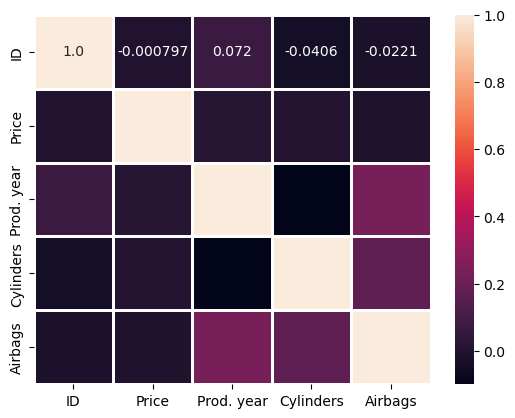

In [66]:
sns.heatmap(data.select_dtypes('number').corr(), annot=True, linewidths=1, fmt='0.3')

In [67]:
data_object = data.select_dtypes(include='object')
data_object.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Levy              18924 non-null  object
 1   Manufacturer      18924 non-null  object
 2   Model             18924 non-null  object
 3   Category          18924 non-null  object
 4   Leather interior  18924 non-null  object
 5   Fuel type         18924 non-null  object
 6   Engine volume     18924 non-null  object
 7   Mileage           18924 non-null  object
 8   Gear box type     18924 non-null  object
 9   Drive wheels      18924 non-null  object
 10  Doors             18924 non-null  object
 11  Wheel             18924 non-null  object
 12  Color             18924 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


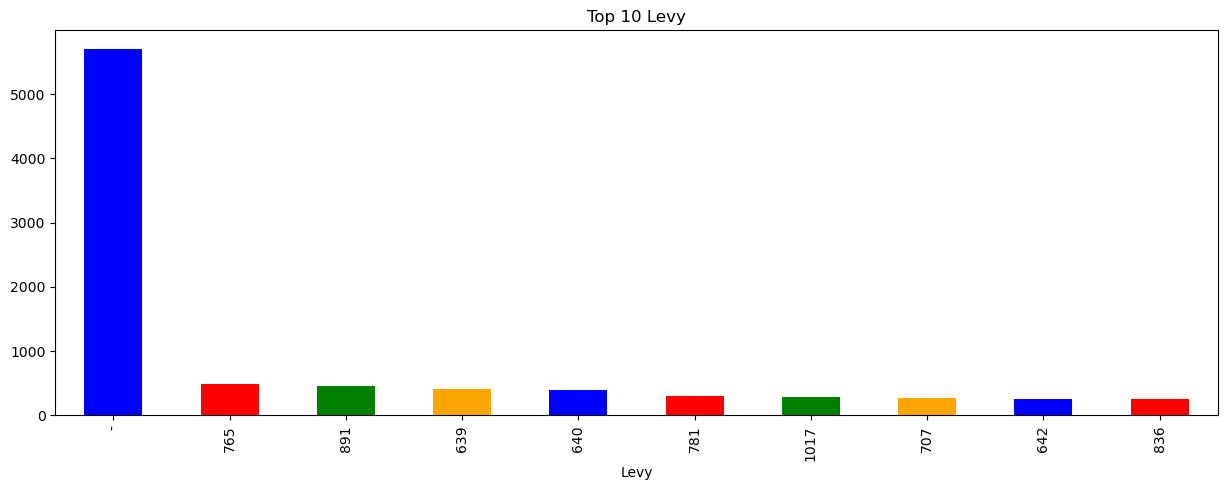

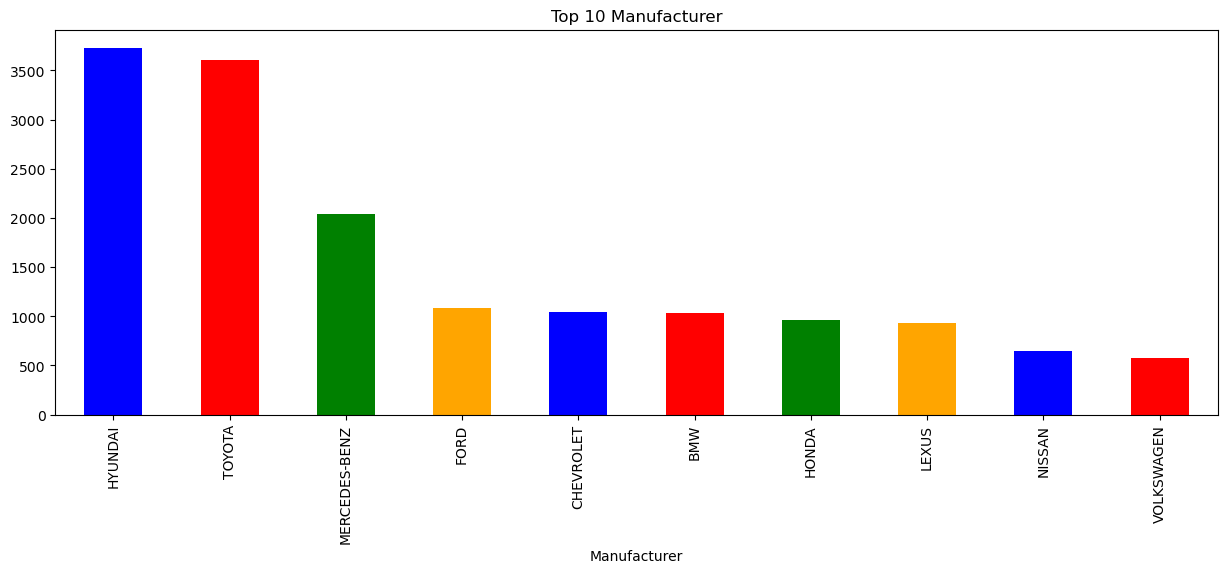

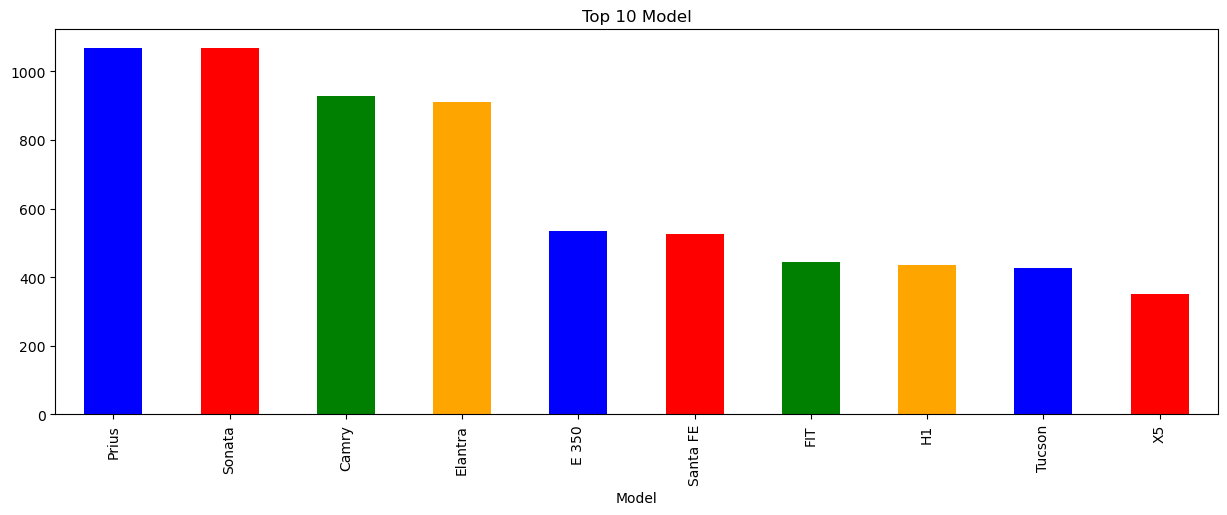

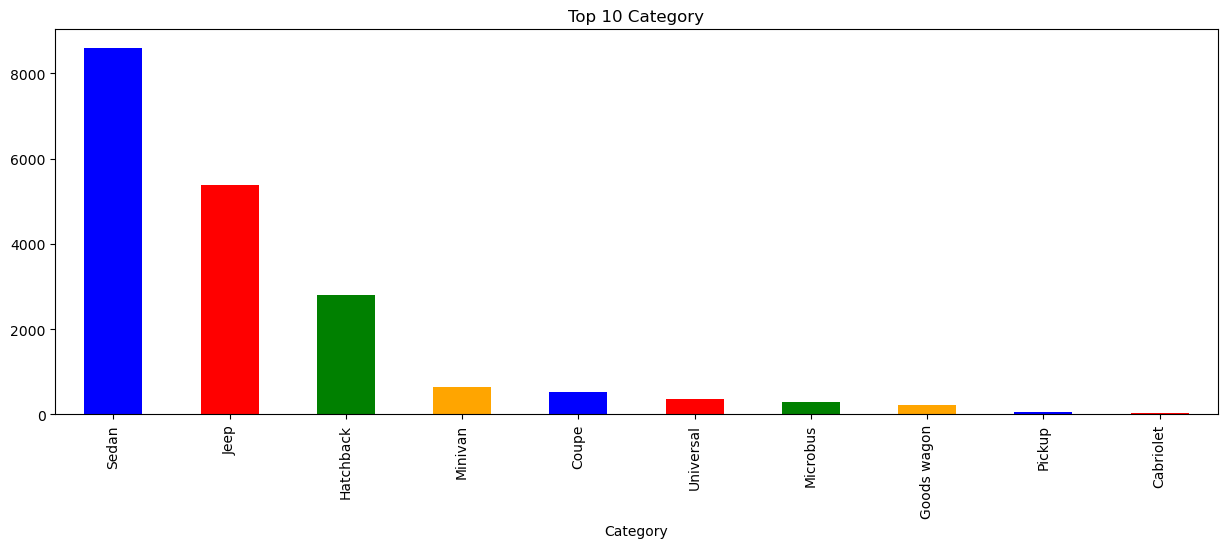

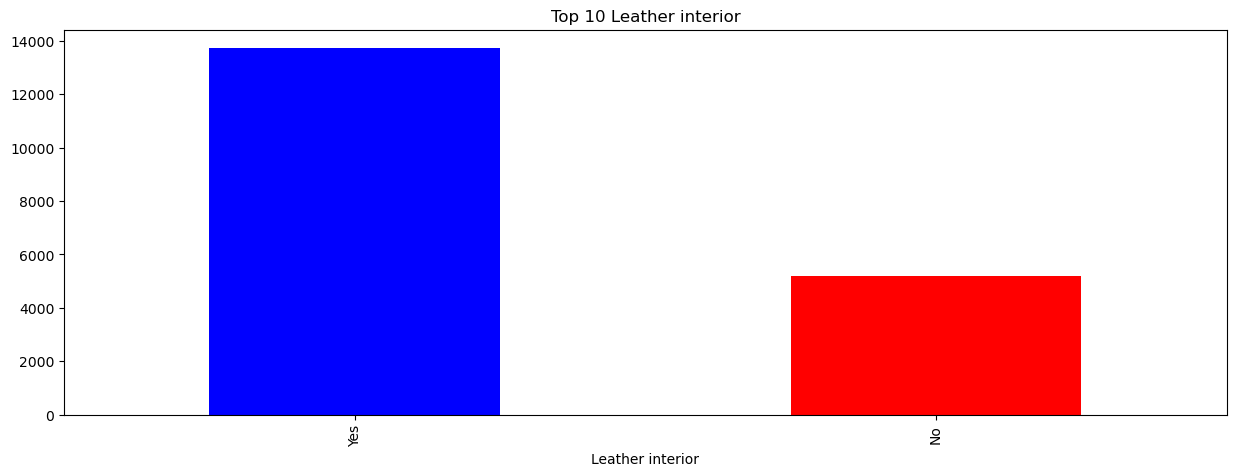

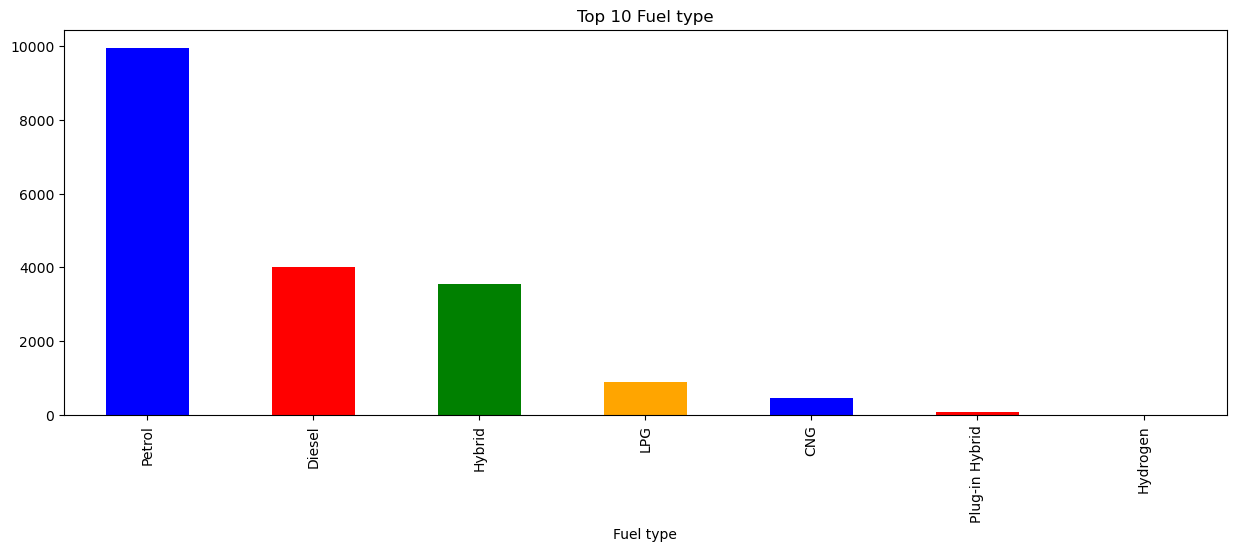

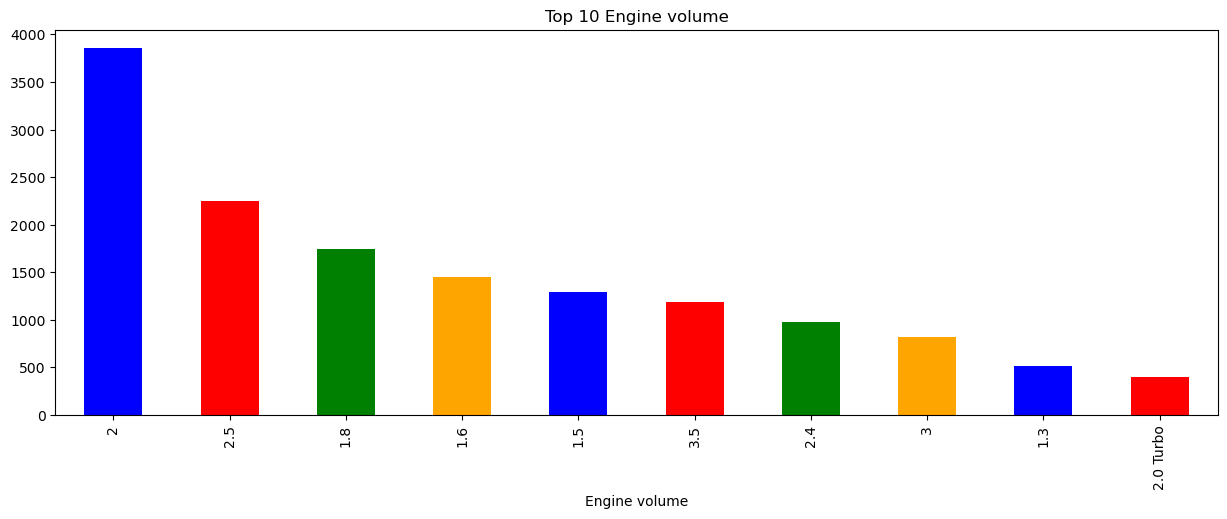

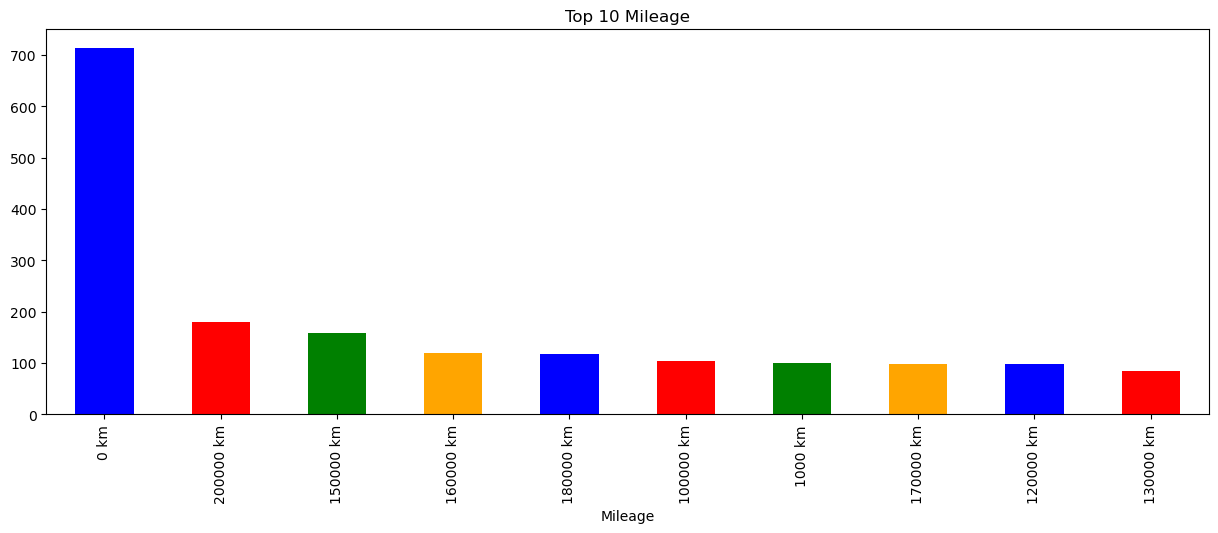

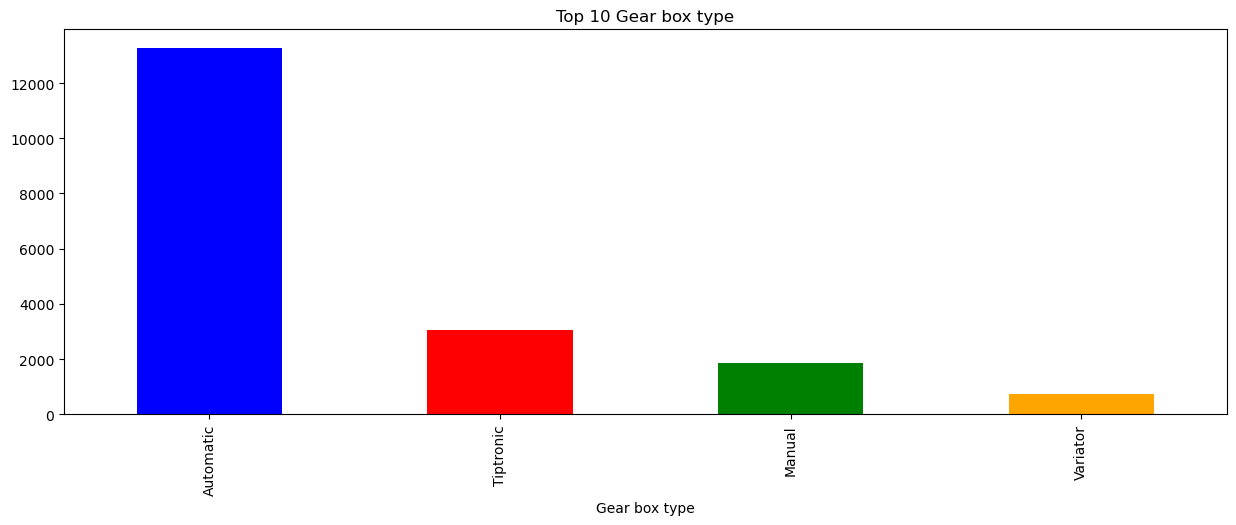

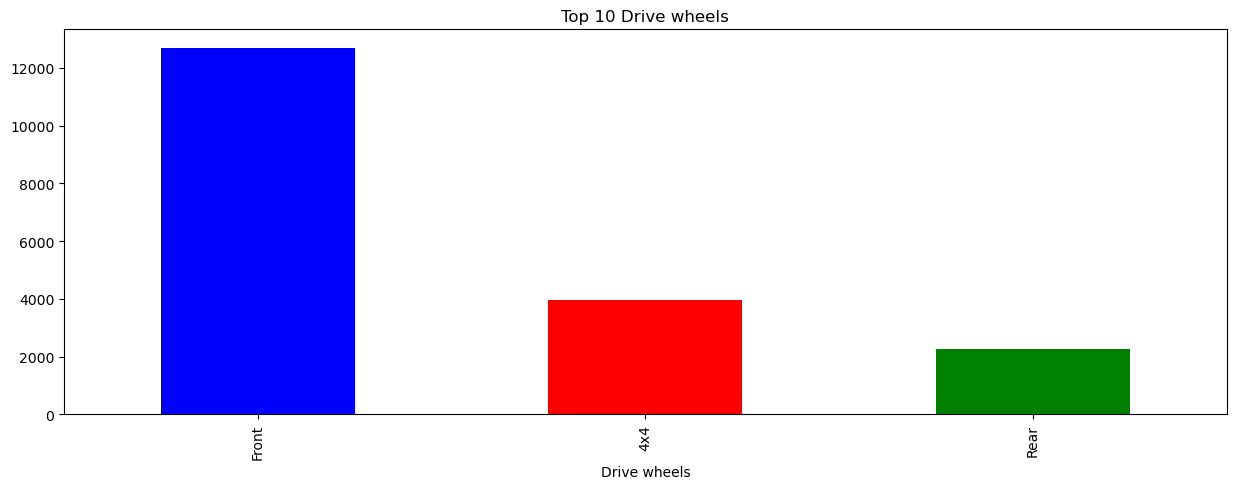

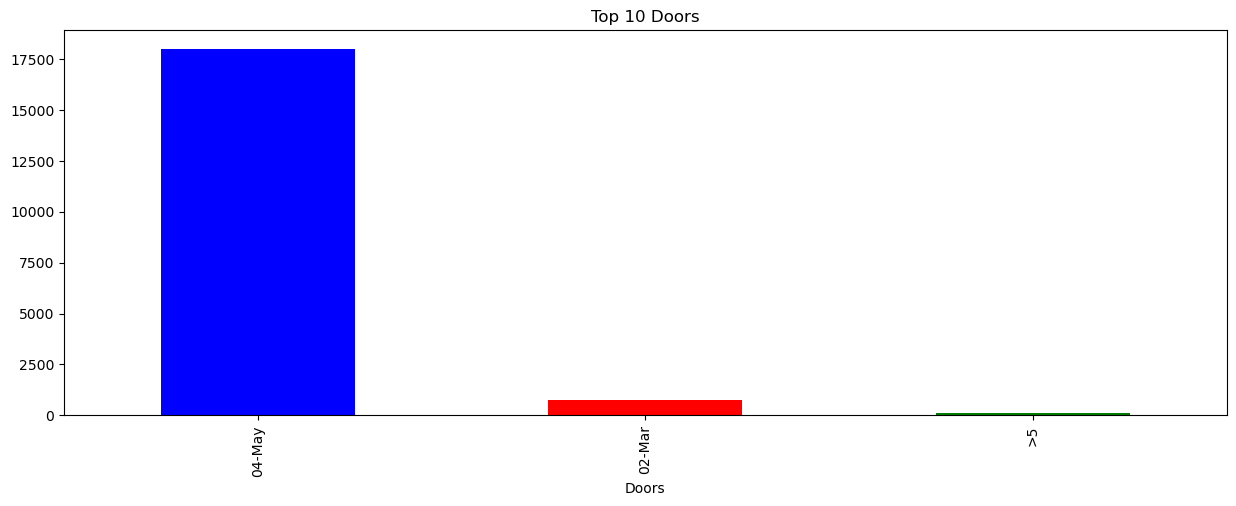

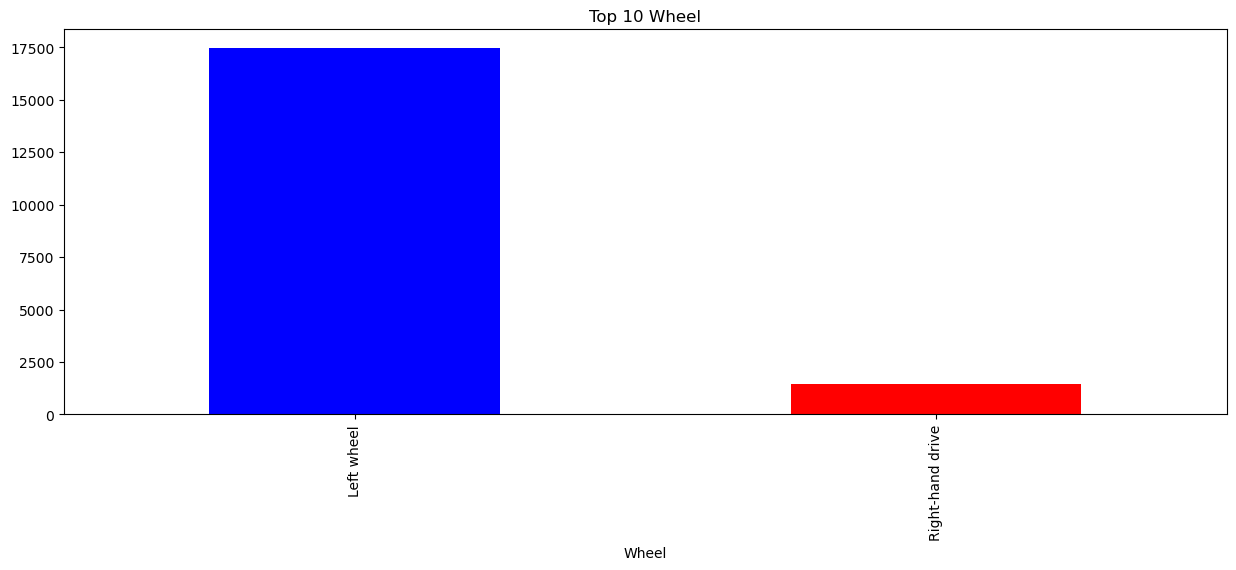

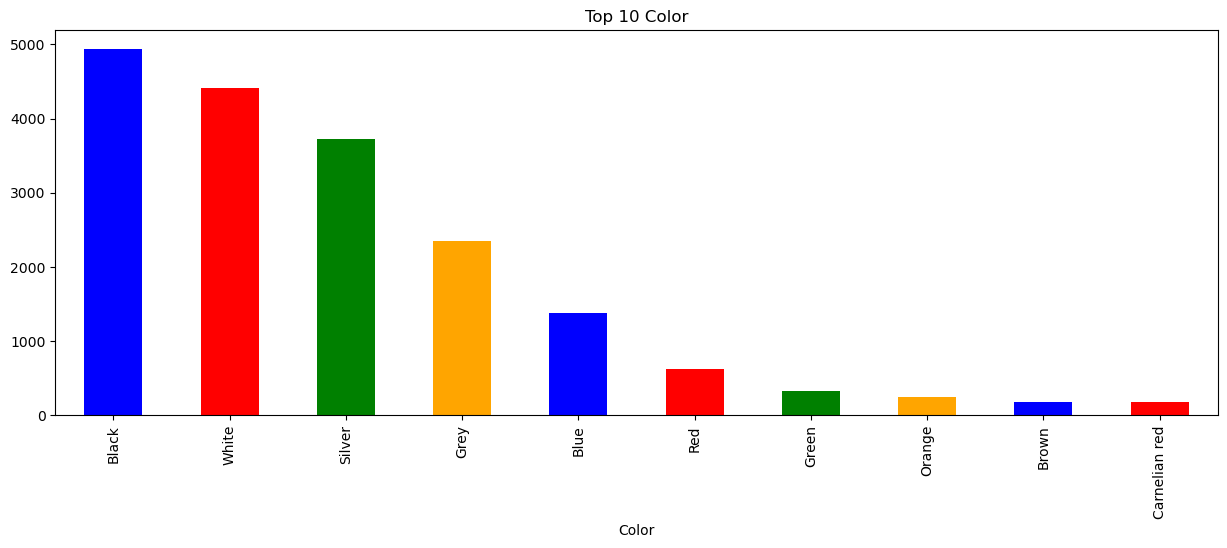

In [68]:
for col in data_object:
    plt.figure(figsize=(15,5))
    top10 = data[col].value_counts()[:10]
    colors = ['blue', 'red', 'green', 'orange']
    top10.plot(kind='bar', color=colors)
    plt.title('Top 10 '+ col)
    plt.show()


## 3- Data Processing

In [69]:
data = data.drop(['ID', 'Doors'], axis=1, errors='ignore')
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4


### Date 

In [70]:

import datetime
dtime = datetime.datetime.now()

In [71]:
data['Age']= dtime.year - data['Prod. year']

In [72]:
data.drop(['Prod. year'], axis=1)

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,14
1,16621,1018,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,13
2,8467,-,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,18
3,3607,862,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,13
4,11726,446,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,Left wheel,Silver,5,25
19233,15681,831,HYUNDAI,Sonata,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,Left wheel,Red,8,13
19234,26108,836,HYUNDAI,Tucson,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,Left wheel,Grey,4,14
19235,5331,1288,CHEVROLET,Captiva,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,Left wheel,Black,4,17


### Levy

In [73]:
data['Levy'].replace(to_replace='-', value=0, inplace=True)
data['Levy'] = data['Levy'].astype(int)

### Milage

In [74]:
data['Mileage'] = data['Mileage'].str.replace(' km', '')
data['Mileage']= data['Mileage'].astype(int)

### Engine volume

In [75]:
data['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [76]:
data['Engine volume'] = data['Engine volume'].str.replace('Turbo', '').astype(float)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  int32  
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Prod. year        18924 non-null  int64  
 5   Category          18924 non-null  object 
 6   Leather interior  18924 non-null  object 
 7   Fuel type         18924 non-null  object 
 8   Engine volume     18924 non-null  float64
 9   Mileage           18924 non-null  int32  
 10  Cylinders         18924 non-null  float64
 11  Gear box type     18924 non-null  object 
 12  Drive wheels      18924 non-null  object 
 13  Wheel             18924 non-null  object 
 14  Color             18924 non-null  object 
 15  Airbags           18924 non-null  int64  
 16  Age               18924 non-null  int64  
dty

### Detect Outlier

In [78]:

data_numeric = data.select_dtypes('number')
for col in data_numeric.columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    outlier = ((data_numeric[col] > high) | (data_numeric[col] < low)).sum() # | : or
    total = data_numeric[col].shape[0]
    print(f'Total Outliers in {col} are {outlier} -- {round(100*(outlier)/total, 2)}%')
    if outlier > 0 :
        data = data.loc[(data[col] <= high) & (data[col] >= low)]


Total Outliers in Price are 1055 -- 5.57%
Total Outliers in Levy are 172 -- 0.91%
Total Outliers in Prod. year are 1492 -- 7.88%
Total Outliers in Engine volume are 1358 -- 7.18%
Total Outliers in Mileage are 775 -- 4.1%
Total Outliers in Cylinders are 4765 -- 25.18%
Total Outliers in Airbags are 0 -- 0.0%
Total Outliers in Age are 1777 -- 9.39%


### Transform Data

In [79]:
dobject = data.select_dtypes(include='object')
dnumeric = data.select_dtypes(exclude='object')

In [80]:
la = LabelEncoder()

In [81]:
for i in range(0, dobject.shape[1]):
    dobject.iloc[:,i] = la.fit_transform(dobject.iloc[:,i])

In [82]:
# Convert DataFrame to numeric type
dobject = dobject.astype('int64')

### Concatenate the subsets in one DataFrame

In [83]:
data = pd.concat([dobject, dnumeric], axis=1)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11744 entries, 2 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      11744 non-null  int64  
 1   Model             11744 non-null  int64  
 2   Category          11744 non-null  int64  
 3   Leather interior  11744 non-null  int64  
 4   Fuel type         11744 non-null  int64  
 5   Gear box type     11744 non-null  int64  
 6   Drive wheels      11744 non-null  int64  
 7   Wheel             11744 non-null  int64  
 8   Color             11744 non-null  int64  
 9   Price             11744 non-null  int64  
 10  Levy              11744 non-null  int32  
 11  Prod. year        11744 non-null  int64  
 12  Engine volume     11744 non-null  float64
 13  Mileage           11744 non-null  int32  
 14  Cylinders         11744 non-null  float64
 15  Airbags           11744 non-null  int64  
 16  Age               11744 non-null  int64  
dty

## 4- Modeling

In [85]:
x = data.drop('Price', axis=1)
y = data['Price']

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [87]:
Algorithm = ['LinearRegression','DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'XGBRFRegressor','SVR']
R2 = []
RMSE = []

In [88]:
def models(model):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    r2 = r2_score(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    R2.append(r2)
    RMSE.append(rmse)
    score = model.score(x_test, y_test)
    print(f'The Score Of Model is : {score}')

In [89]:
model_1 = LinearRegression()
model_2 = DecisionTreeRegressor()
model_3 = RandomForestRegressor()
model_4 = GradientBoostingRegressor()
model_5 = XGBRFRegressor()
model_6 = SVR()

In [96]:
models(model_1)
models(model_2)
models(model_3)
models(model_4)
models(model_5)
models(model_6)

The Score Of Model is : 0.23357657933032328
The Score Of Model is : 0.620622117173357
The Score Of Model is : 0.7915973589954282
The Score Of Model is : 0.6745593971517907
The Score Of Model is : 0.6509377855436764
The Score Of Model is : 0.0020915026386959523


In [91]:
df = pd.DataFrame({'Algorithm':Algorithm, 'R2_Score':R2, 'RMSE': RMSE})
df

,Algorithm,R2_Score,RMSE
0,LinearRegression,0.233577,9988.281414
1,DecisionTreeRegressor,0.584202,7356.946117
2,RandomForestRegressor,0.788656,5245.075133
3,GradientBoostingRegressor,0.674456,6509.702109
4,XGBRFRegressor,0.650938,6740.743565
5,SVR,0.002092,11397.293872


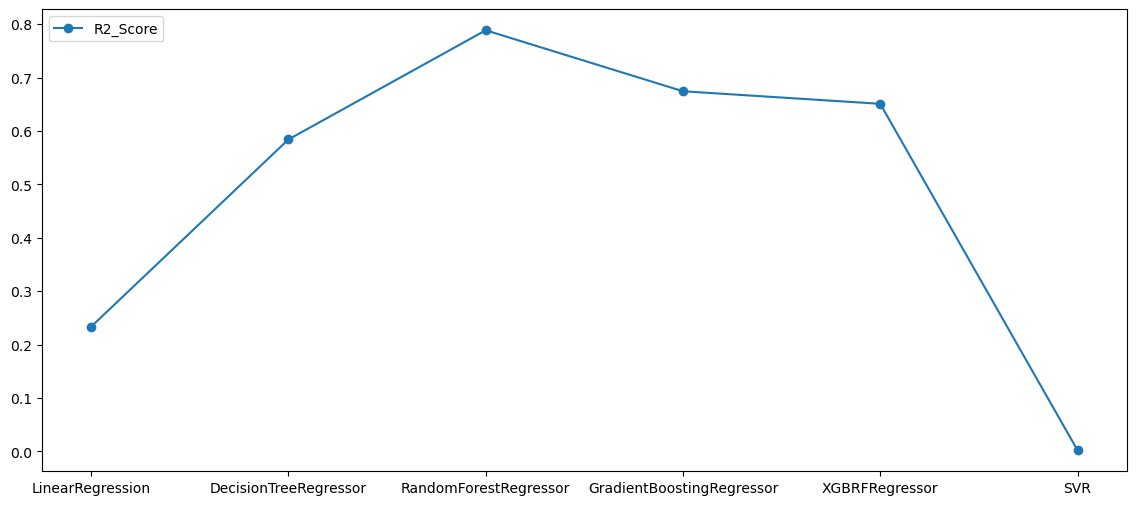

In [102]:
fig, sx = plt.subplots(figsize= (14,6))
plt.plot(df['Algorithm'], df['R2_Score'], label='R2_Score',marker = 'o')
plt.legend(loc=2)

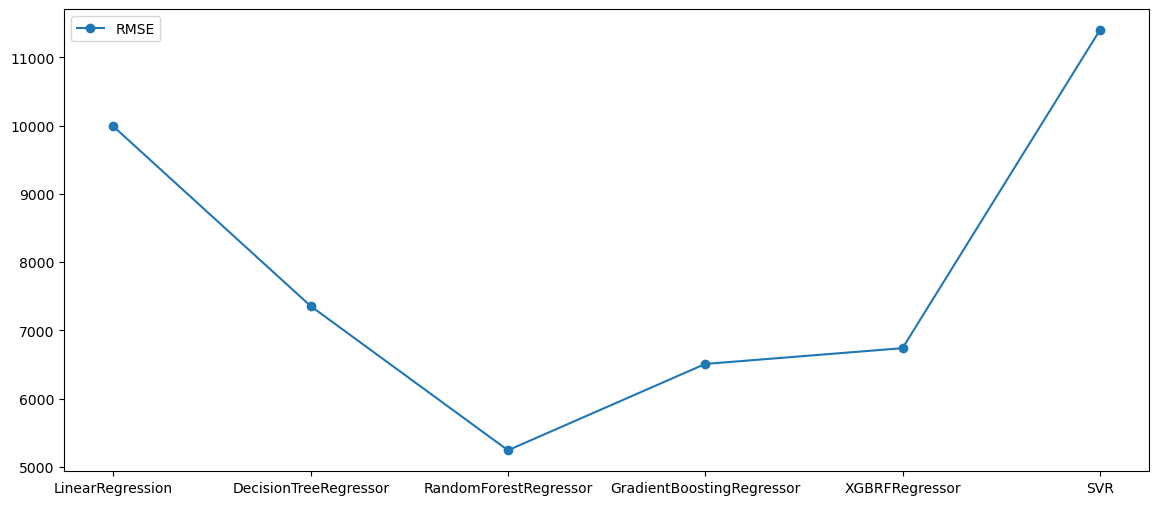

In [103]:
fig, sx = plt.subplots(figsize= (14,6))
plt.plot(df['Algorithm'], df['RMSE'], label='RMSE', marker = 'o')
plt.legend(loc=2)

## Using Model Result To Predict New Data

In [109]:
import pickle

In [110]:
file_name = 'Cars_Predictions.sav'

In [111]:
pickle.dump(model_3, open(file_name,'wb'))